## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number = combined_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df= combined_df.duplicated(subset=["Mouse ID","Timepoint"])
duplicate_df.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep="last")
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_number = cleaned_df["Mouse ID"].nunique()
cleaned_mice_number

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen=cleaned_df["Drug Regimen"].unique()
drug_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [8]:
drug_regimen_mean =[]
drug_regimen_median =[]
drug_regimen_var =[]
drug_regimen_std =[]
drug_regimen_sem =[]
for drug in drug_regimen:
    drug_regimen_mean.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].mean())
    drug_regimen_median.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].median())
    drug_regimen_var.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].var())
    drug_regimen_std.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].std())
    drug_regimen_sem.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].sem())
summary_stats = pd.DataFrame({
    "Drug Regimen": drug_regimen,
    "Mean": drug_regimen_mean,
    "Median":drug_regimen_median,
    "Variance":drug_regimen_var,
    "Standard Deviation":drug_regimen_std,
    "SEM":drug_regimen_sem
})
summary_stats

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
grouped_regimen = cleaned_df.groupby(["Drug Regimen"])
grouped_regimen_df= pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].count())
grouped_regimen_df["Mean"]= pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].mean())
grouped_regimen_df["Median"] = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].median())
grouped_regimen_df["Variance"] = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].var())
grouped_regimen_df["Standard Deviation"] = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].std())
grouped_regimen_df["SEM"] = pd.DataFrame(grouped_regimen["Tumor Volume (mm3)"].sem())

grouped_regimen_df

,Tumor Volume (mm3),Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,156,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
grouped_regimen_df=grouped_regimen_df.drop(columns=["Tumor Volume (mm3)"])
grouped_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

regimen_mice_number = grouped_regimen["Mouse ID"].nunique()
regimen_mice_number 

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

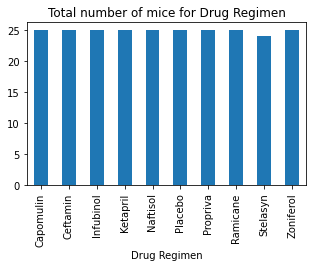

<Figure size 432x288 with 0 Axes>

In [19]:
regimen_mice_number.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Total number of mice for Drug Regimen")

plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
